# Corona Virus Study 1 ; Spread in India compared with Italy and S Korea 



##  Import Libraries 

In [1]:
# import the necessary Core  libraries
import numpy as np 
import pandas as pd 
import os

In [2]:
# One time installs 
#!pip install pycountry
#!pip install pywaffle
#!pip install folium

In [3]:
# Import Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py

from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

##  Read Input files 



In [4]:
#Day by day data All countries 
#--------------------------------
# confirmed cases
df_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
df_conf1 = df_confirmed.copy()
# recovered 
df_recovered = pd.read_csv('time_series_covid_19_recovered.csv')
df_recov1 = df_recovered.copy()
# deaths 
df_deaths    = pd.read_csv('time_series_covid_19_deaths.csv')
df_deaths1 = df_deaths.copy()

## Pre Process Confirmed cases 

In [5]:
# Check data 
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
# Get column names 
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [7]:
# Drop columns not needed for this Analysis  
df_confirmed.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

# Rename to shorter column names 
df_confirmed.rename(columns= {'Country/Region':'Region'},inplace= True)

In [8]:
# Check DF after drop and rename 
df_confirmed.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [9]:
# Create Listof countries to Analyse
plot_countries = ['India','Iran','Italy','Korea, South']

# subset by countries to plot 
df_conf_plot= df_confirmed[df_confirmed.Region.isin(plot_countries)]

# Transpose df
df_conf_plot_T = df_conf_plot.T

# Check Actual Col Names 
df_conf_plot_T.head()

,15,16,155,156
Region,India,Italy,Iran,"Korea, South"
1/22/20,0,0,0,1
1/23/20,0,0,0,1
1/24/20,0,0,0,2
1/25/20,0,0,0,2


In [10]:
# Rename Columns 
df_conf_plot_T.rename(columns= {15:'India',16:'Italy',155:'Iran',156:'Korea, South'},inplace= True)

# drop first row 
df_conf_plot_T.drop(df_conf_plot_T.index[0],inplace=True)

# name Index 
df_conf_plot_T.index.name='DATE'

# Check 
df_conf_plot_T.head()

,India,Italy,Iran,"Korea, South"
DATE,,,,
1/22/20,0,0,0,1
1/23/20,0,0,0,1
1/24/20,0,0,0,2
1/25/20,0,0,0,2
1/26/20,0,0,0,3


## Pre process ; Recovered file 

In [11]:
# Check data 
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,35,41,42,42,42,42,44
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,144,144,144,150,191,232,235
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,97,105,105,109,114,114,114,124,140,144
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,35,42,42,49,60,75,87,114,139


In [12]:
# Get column names 
df_recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [13]:
# Drop columns not needed for this Analysis  
df_recovered.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

# Rename to shorter column names 
df_recovered.rename(columns= {'Country/Region':'Region'},inplace= True)


In [14]:
# Check DF after drop and rename 
df_confirmed.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [15]:
# subset by countries to plot 
df_recov_plot= df_recovered[df_recovered.Region.isin(plot_countries)]

# Transpose df
df_recov_plot_T = df_recov_plot.T

# Check Actual Col Names 
df_recov_plot_T.head()

,15,16,155,156
Region,India,Italy,Iran,"Korea, South"
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0


In [16]:
# Rename Columns 
df_recov_plot_T.rename(columns= {15:'India',16:'Italy',155:'Iran',156:'Korea, South'},inplace= True)

# drop first row 
df_recov_plot_T.drop(df_conf_plot_T.index[0],inplace=True)

# name Index 
df_recov_plot_T.index.name='DATE'

# Check 
df_recov_plot_T.head()

,India,Italy,Iran,"Korea, South"
DATE,,,,
Region,India,Italy,Iran,"Korea, South"
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0


## Pre process : fatality 

In [17]:
# Check data 
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


In [18]:
# Get column names 
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [19]:
# Drop columns not needed for this Analysis  
df_deaths.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

# Rename to shorter column names 
df_deaths.rename(columns= {'Country/Region':'Region'},inplace= True)

In [20]:
# Check DF after drop and rename 
df_deaths.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [21]:
# subset by countries to plot 
df_deaths_plot= df_deaths[df_deaths.Region.isin(plot_countries)]

# Transpose df
df_deaths_plot_T = df_deaths_plot.T

# Check Actual Col Names 
df_deaths_plot_T.head()

,15,16,155,156
Region,India,Italy,Iran,"Korea, South"
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0


In [22]:
# Rename Columns 
df_deaths_plot_T.rename(columns= {15:'India',16:'Italy',155:'Iran',156:'Korea, South'},inplace= True)

# drop first row 
df_deaths_plot_T.drop(df_deaths_plot_T.index[0],inplace=True)

# name Index 
df_deaths_plot_T.index.name='DATE'

# Check 
df_deaths_plot_T.head()

,India,Italy,Iran,"Korea, South"
DATE,,,,
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0


##  Compare Spreads Across Countries 


In [23]:
# copy DFs for plot
df_confirmed_All = df_conf_plot_T.copy()
df_recovered_All = df_recov_plot_T.copy()
df_deaths_All    = df_deaths_plot_T.copy()

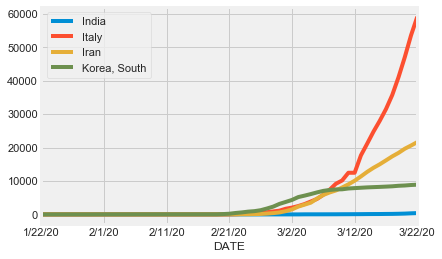

In [24]:
df_confirmed_All.plot();

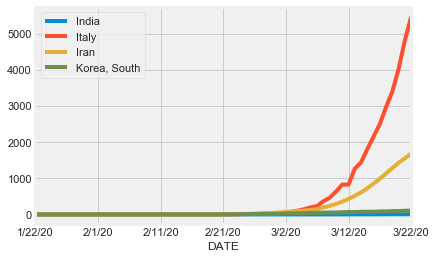

In [27]:
#df_recovered_All.plot();
df_deaths_plot_T.plot();

##  Cases in India  vs Deaths 

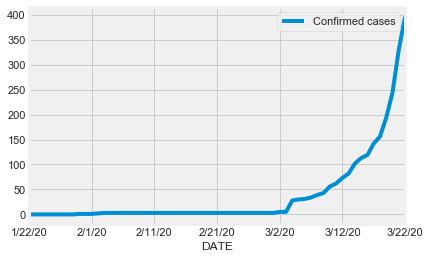

In [40]:
s1 = df_confirmed_All['India']
s2 = df_deaths_All['India']

df_India_spread = pd.DataFrame({'Confirmed cases':s1})
df_India_spread.fillna(0, inplace=True)
df_India_spread.plot();

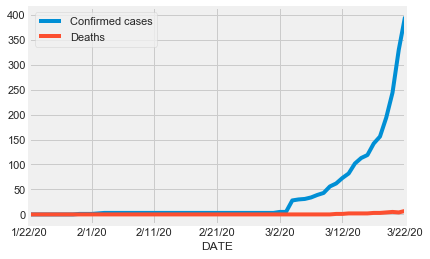

In [28]:
s1 = df_confirmed_All['India']
s2 = df_deaths_All['India']

df_India = pd.DataFrame({'Confirmed cases':s1,'Deaths':s2})
df_India.fillna(0, inplace=True)
df_India.plot();